In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import cov
from numpy import corrcoef
import statsmodels.api as sm
from scipy.stats import linregress

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [66]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame ({'age':[17,51,27,21,36,48,19,26,54,30], 'tardies':[10,1,5,9,4,2,9,6,0,3]})


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='age', ylabel='tardies'>

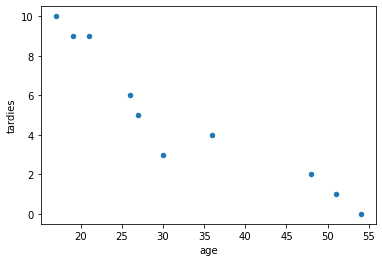

In [67]:
# Your code here.
student_data.plot.scatter(x='age', y='tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [12]:
# Your response here. 
# Se logra apreciar en la grafica que a menor edad de los alumnos mayor tardanza, y conforme los alumnos tienen mas edad las tardanzas se van reduciendo

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [68]:
# Your response here.
#Covariance
covariance = cov(student_data['age'], student_data['tardies'])[0,1]
correlation = corrcoef(student_data['age'], student_data['tardies'])[0,1]
print('covariance = ', covariance)
print('correlation = ', correlation)

# Se puede concluir que hay una correlacion fuerte entre la edad y las llegadas tardes pues tenemos un valor muy cercano al -1
# De igual manera, se puede concluir que es una correlacion negativa, tema que se corrobora con la covarianza pues el valor se
# dirige a un valor negativo, lo cual indica que las tardanzas decrecen a medida que la edad sube.


covariance =  -45.56666666666666
correlation =  -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [90]:
# Your response here.

X = sm.add_constant(student_data['age'])
y = student_data['tardies']
reg_model = sm.OLS (y, X).fit()

print(reg_model.summary())

# se puede ver que el valor de R2 esta en 0.88 lo cual indica que el modelo propuesto esta ajustando bien la informacion (especialmente al tratarse de una simple linear regression)
# En cuanto al adjusted R, esta en una valor de 0.86, lo cual indica que el modelo si se explica bien (variabilidad)
# Para una regresion simple el F-statistic no es tan significativo, por lo que no estoy tomando mucho en cuenta el valor obtenido
# Por ultimo, el p-value muy bajo nos indica una adicion significativa

                            OLS Regression Results                            
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           5.57e-05
Time:                        08:09:47   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\jfcon\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

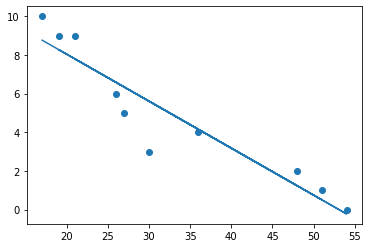

In [88]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data.age, student_data.tardies)
plt.plot(student_data.age, reg_model.predict(x))

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [91]:
# Your response here. 
#Si se logra aprecior relacion entre las dos variables evaluadas, con una tendencia negativa

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [76]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [77]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [100]:
# Your response here. 
corr_vehicles = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
corr_vehicles.corr()

# La variable con correlacion mas fuerte y que ayuda a determinar de mejor manera las emisiones de CO2 es la variable "Fuel Barrels/Year" = 0.986
# Mientras que la variable con menos correlacion y que aporta menos es "Year"  de produccion del vehiculo, lo anterior al presentar un valor negativo

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [108]:
# Your response here. 
corr_vehicles2 = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
X = sm.add_constant(corr_vehicles2)
y = vehicles['CO2 Emission Grams/Mile']
reg_linear_mod = sm.OLS(y,X).fit()
predict = reg_linear_mod.predict(X)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [136]:
# Your response here. 

print(reg_linear_mod.summary())
# Se logra apreciar un R2 muy cercano a 1 lo cual nos indica que nuestro modelo si esta explicando bien. Tomando en cuenta que estamos 
#llevando a cabo una regresion multiple, es importante considerar el adjusted R cuyo valor esta muy cercano a 1 y esto nos dice que
# una buena parte de la variabilidad en la salida del modelo se esta explicando.
# El estadistico F tambien arrojo un valor grande por l que indica que es altamente significativo y mas tratandose de regresion multiple.
# Por ultimo revisamos el valor p-value y todos estan en ceros lo cual nos dice que es un buen modelo

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                             08:56:37   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [120]:
# Your code here. 
party_data = pd.DataFrame ({'invites':[1,3,4,6,8,9,11,14], 'attendance':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

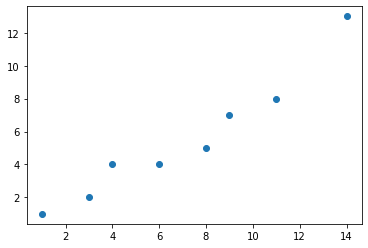

In [132]:
# Your code here.
# party_data.plot.scatter(x ='invites', y ='attendance')

plt.scatter(party_data.invites, party_data.attendance)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [134]:
# Your response here. 
lin_regress_results = linregress(x=party_data.invites, y=party_data.attendance)
lin_regress_results

# Despues de realizar la grafica podriamos suponer que existe correlacion positiva entre ambas variables al verse una linearidad. 
# importante comentar que el tamano del muestreo es pequeno lo cual podria ser enganoso.

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217, intercept_stderr=0.7592153973608793)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

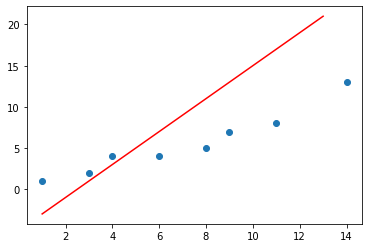

In [138]:
# Your response here. 

plt.scatter(party_data.invites, party_data.attendance)
x = [party_data.invites.min(),party_data.attendance.max()]
y = [party_data.invites.min()*2 - 5,party_data.attendance.max()*2 - 5]
plt.plot(x,y, color='r')

# Se logra apreciar que nuestra pendiente (slope) apartir del valor 6 en el eje de las abcisas se empieza a alejar de los valores
# los cuales parecerian ser valores atipicos para el modelo;

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

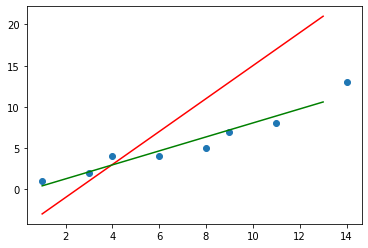

In [133]:
# Your response here. 

plt.scatter(party_data.invites, party_data.attendance)
x = [party_data.invites.min(),party_data.attendance.max()]
y = [party_data.invites.min()*2 - 5,party_data.attendance.max()*2 - 5]
plt.plot(x,y, color='r')

x = [party_data.invites.min(),party_data.attendance.max()]
y = [party_data.invites.min()*slope + intercept, party_data.attendance.max()*slope + intercept]
plt.plot(x,y, color='g');

In [137]:
# una vez que aplicamos la regresion al modelo se logra ver que la slope se acerca mas a los puntos del muestreo lo cual nos indica que se reducen los errores
# y que se mejora el modelo utilizado